In [10]:
using ArraySignalProcessing
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
Δ = 1

# test signal generation
Rss = I(2)
Θ = deg2rad.([10, 65])
d = length(Θ)
N = 300
SNR = 15
X = unconditional_signals(pa, Rss, N, SNR, Θ, fc)

θgrid = Vector(-90:90)
A = steer(pa, deg2rad.(θgrid), fc)
spectrum = bpdn(X, A, 10)
threshold = 15
Θest = θgrid[spectrum .> threshold]
println(Θest)
println(spectrum[spectrum .> threshold])

------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 108782, constraints m: 111183
cones: 	  l: linear vars: 1
	  q: soc vars: 111182, qsize: 182
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 975183, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|2.00e+001 1.00e+000 3.62e+003 -1.81e+003 1.00e-001 1.66e-001 
   250|8.43e-003 5.31e-004 3.62e-002 1.83e+0

┌ Info: [Convex.jl] Compilation finished: 1.61 seconds, 1.739 GiB of memory allocated
└ @ Convex C:\Users\matt\.julia\packages\Convex\IPPoR\src\solution.jl:107


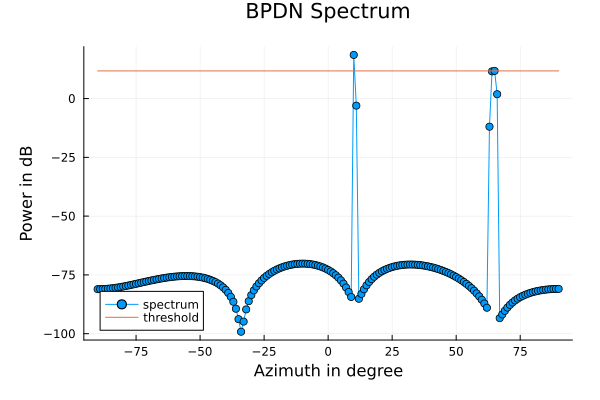

In [11]:
using Plots
import Measures
p1 = plot(θgrid, 10*log10.(abs.(spectrum)),marker=:dot, label="spectrum")
plot!(title="BPDN Spectrum", margin=5*Measures.mm)
plot!(θgrid,  10*log10.(threshold)*ones(length(θgrid),1), label="threshold")
xlabel!("Azimuth in degree")
ylabel!("Power in dB")